In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
LR = 0.8
epochs = 15000

input_size = 2
hidden_size = 2
output_size = 1

In [ ]:
V = np.random.normal(scale=0.5, size=(input_size, hidden_size))
W = np.random.normal(scale=0.5, size=(hidden_size , output_size))

V0 = np.random.normal(scale=0.5, size=(1, hidden_size))
W0 = np.random.normal(scale=0.5, size=(1, output_size))

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)

def sigmoid_derivative(x):
    return x*(1 - x)

In [ ]:
X = np.array([[0.4, -0.7],
              [0.3, -0.5],
              [0.6, 0.1],
              [0.2, 0.4]])

Y = np.array([[0.1],
              [0.5],
              [0.3],
              [0.25]])

In [ ]:
'''
#XOR gate
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

Y = np.array([[0],
              [1],
              [1],
              [0]])
'''

'\nX = np.array([[0, 0],\n              [0, 1],\n              [1, 0],\n              [1, 1]])\n\nY = np.array([[0],\n              [1],\n              [1],\n              [0]])\n'

In [ ]:
mse = []
for epoch in range(epochs):
    # Forward path
    I_h = np.dot(X, V) + V0
    O_h = sigmoid(I_h)
    I_o = np.dot(O_h, W) + W0
    O_o = sigmoid(I_o)
    mse.append(mean_squared_error(O_o, Y))

    # Backpropagation
    error = Y - O_o
    dk = error * sigmoid_derivative(O_o)
    W += LR * np.dot(O_h.T, dk)
    W0 += LR * np.sum(dk, axis=0, keepdims=True)

    d_inj = np.dot(dk, W.T)
    dj = d_inj * sigmoid_derivative(O_h)
    V += LR * np.dot(X.T, dj)
    V0 += LR * np.sum(dj, axis=0, keepdims=True)

In [ ]:
V

array([[ 1.22405458,  4.42503936],
       [ 4.97227707, -5.12119721]])

In [ ]:
W

array([[-3.87996838],
       [-6.71560921]])

In [ ]:
V0

array([[-0.51057446, -4.78153381]])

In [ ]:
W0

array([[2.2112125]])

In [ ]:
I_h = np.dot(X, V) + V0
O_h = sigmoid(I_h)
I_o = np.dot(O_h, W) + W0
O_o = sigmoid(I_o)

print("True Y:\n",Y,'\n')
print("Pred Y:\n",O_o)

True Y:
 [[0.1 ]
 [0.5 ]
 [0.3 ]
 [0.25]] 

Pred Y:
 [[0.1000046 ]
 [0.49999784]
 [0.30000059]
 [0.24999982]]


Text(0, 0.5, 'MSE')

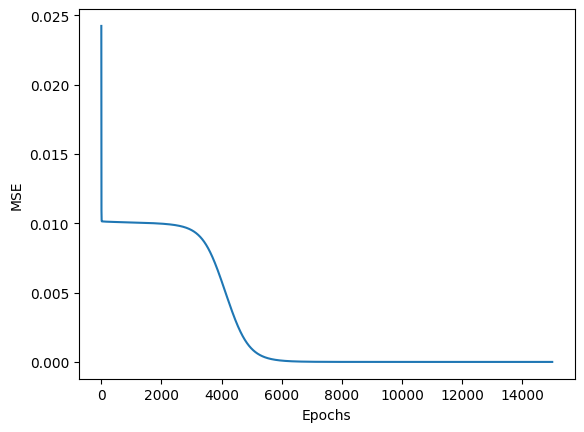

In [ ]:
plt.plot(range(epochs),mse)
plt.xlabel("Epochs")
plt.ylabel("MSE")